# Svm Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [15]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
df.shape

(1797, 65)

In [21]:
#list(digits.target)
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]
df3 = df[df['target'] == 3]

In [23]:
#plt.scatter(df0, df1, color='green')

In [29]:
X = df.drop('target', axis=1)
y = df.target

#### Machine Learning model

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.svm import SVC

In [36]:
model = SVC(gamma='auto', C=100)

In [37]:
model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
model.score(X_test, y_test)

0.5222222222222223

Optimization for C(Regularization)

In [58]:
c_values = np.arange(1,200,10)
score = [ ]
for c in c_values:
    model1 = SVC(C=c, gamma='scale')
    model1.fit(X_train, y_train)
    score.append(model1.score(X_test,y_test))

In [45]:
#score

Text(0.5, 1.0, 'Score against C values')

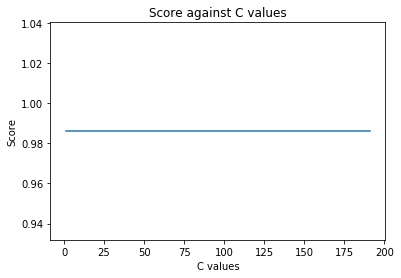

In [59]:
plt.plot(c_values, score)
plt.xlabel('C values')
plt.ylabel('Score')
plt.title('Score against C values')

In [60]:
#whena gamma is auto

c_values = np.arange(1,200,10)
score = [ ]
for c in c_values:
    model1 = SVC(C=c, gamma='auto')
    model1.fit(X_train, y_train)
    score.append(model1.score(X_test,y_test))

Text(0.5, 1.0, 'Score against C values')

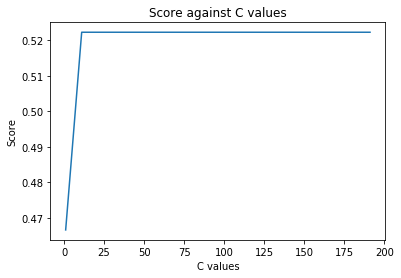

In [61]:
plt.plot(c_values, score)
plt.xlabel('C values')
plt.ylabel('Score')
plt.title('Score against C values')

Optimization for Gamma

In [51]:
gammas = np.arange(1,200,10)
score = [ ]
for gamma in gammas:
    model2 = SVC(C=100, gamma=gamma)
    model2.fit(X_train, y_train)
    score.append(model2.score(X_test,y_test))

Text(0.5, 1.0, 'Score against gamma values')

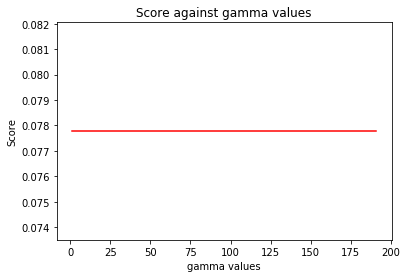

In [52]:
plt.plot(gammas, score, color='red')
plt.xlabel('gamma values')
plt.ylabel('Score')
plt.title('Score against gamma values')

Optimization for Kernels

Accuracy is  0.9777777777777777 for linear
Accuracy is  0.9861111111111112 for poly
Accuracy is  0.9861111111111112 for rbf
Accuracy is  0.7833333333333333 for sigmoid


Text(0.5, 1.0, 'Score against Kernel values')

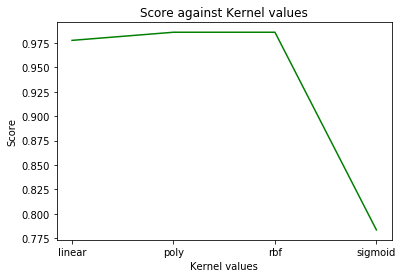

In [70]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score = []
for kernel in kernels:
    model3 = SVC(C=100, gamma='scale', kernel=kernel)
    model3.fit(X_train, y_train)
    accuracy = model3.score(X_test,y_test)
    print('Accuracy is ',accuracy, 'for', kernel)
    score.append(accuracy)
    #print('Accuracy is ',score, 'for', kernel)
    
plt.plot(kernels, score, color='green')
plt.xlabel('Kernel values')
plt.ylabel('Score')
plt.title('Score against Kernel values')

Final Model design with optimised options

In [73]:
real_model = SVC(C=100, gamma='scale', kernel='rbf')

In [74]:
real_model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
real_model.score(X_test, y_test)

0.9861111111111112